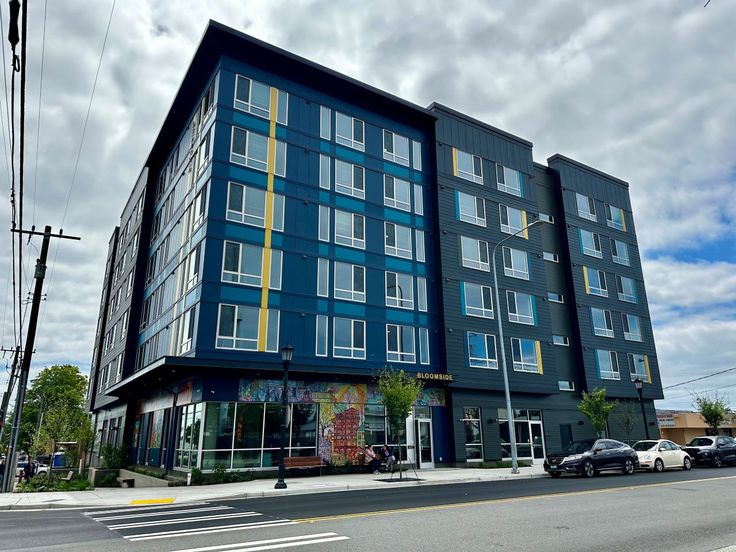

First of all, house sales in king county is a popular dataset used to practice machine learning it contains information about houses sold in king county which includes seattle washington and surrounding areas the dataset includes features like the number of bedrooms and bathrooms square footage location year built and the price the goal is usually to predict the price of a house based on these features.

In fact, linear regression is one of the simplest and most commonly used algorithms in machine learning it tries to find the best straight line that fits the data this line is used to make predictions it works by finding the relationship between independent variables like square footage or number of bedrooms and the dependent variable which is usually the house price in this case.

In [ ]:
from zipfile import ZipFile as zp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

After importing necessary libraries, we should load our Credit Card Dataset ([kaggle dataset link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download))

In [ ]:
dz = zp("/content/archive.zip")
data = pd.read_csv(dz.open("kc_house_data.csv"))
data_copy = data.copy()

data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
data.shape

(21613, 21)

Using ".shape " we can learn size of our dataset (number of columns and rows)

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Alternatively, we can use ".isna().sum() ", there is no difference between them.

As a result, we don't have any NULL values.

<Axes: >

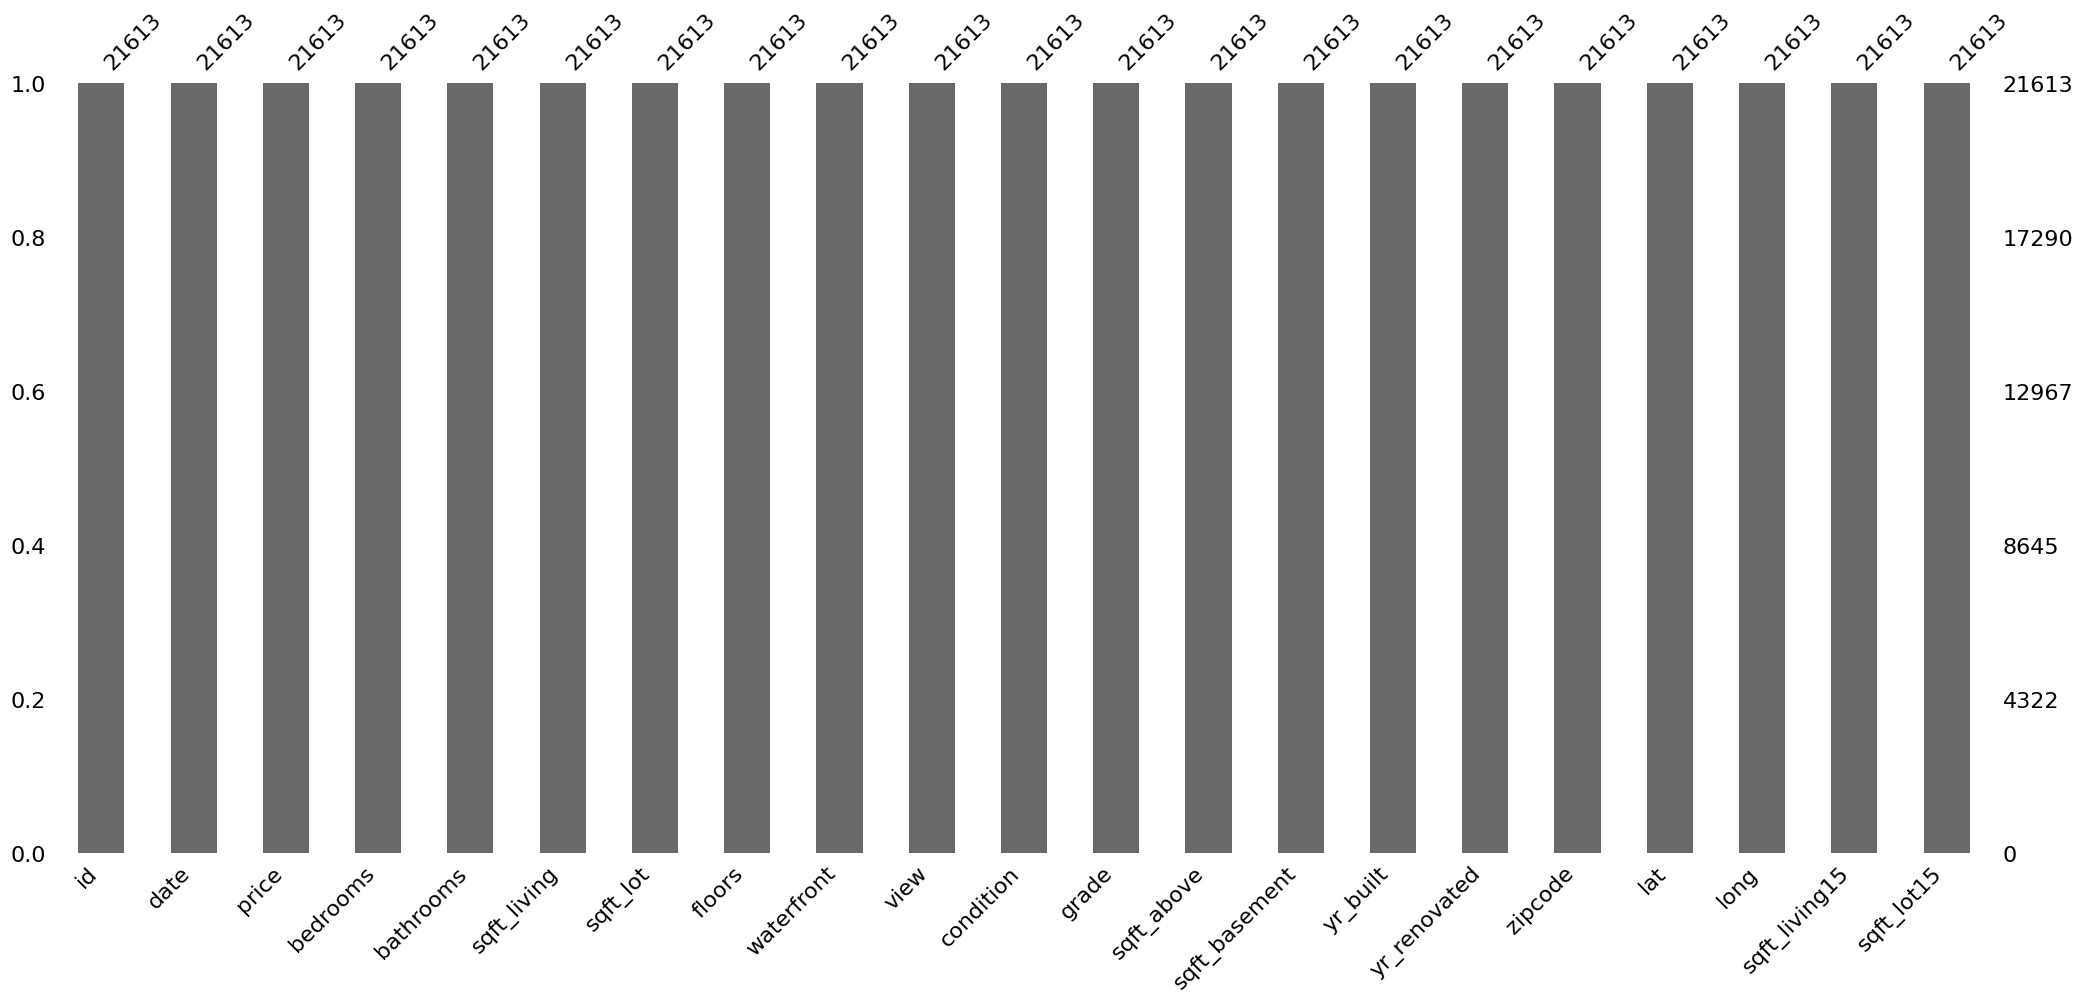

In [ ]:
ms.bar(data)

missingo is a Python library used to quickly visualize and understand missing data patterns in a dataset through heatmaps, dendograms, bar charts, matrix plots, and so forth.

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


when we run *data.describe()* we get a quick summary of the numerical columns in our dataset. It shows us important statistics like the total count of values in each column, the average or mean, the standard deviation which tells us how spread out the values are, the minimum and maximum values, and also the values at the 25th 50th and 75th percentiles. This helps us understand the overall distribution of the data and spot any unusual values or patterns before we build our model.

In [ ]:
#Our target column will be "price", however before creating X and y, let's count its values

print(data['price'].value_counts())

price
450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
280400.0       1
118000.0       1
202200.0       1
1851000.0      1
320600.0       1
Name: count, Length: 4028, dtype: int64


It shows the number of times each house price appears in the dataset. For example, the price four hundred fifty thousand appears one hundred seventy two times which means that many houses were sold at that exact price. Similarly, three hundred fifty thousand also appears one hundred seventy two times. Some prices like one million eight hundred fifty one thousand appear only once. This kind of data helps us understand which price points are more common and which ones are rare, it also shows us how prices are distributed across the dataset, and can hint at popular market values or price clusters.

In [ ]:
# Split data into features and target

features = ['sqft_living', 'bedrooms']
target = 'price'

x = data[features]
y = data[target]

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

* *Scaling*

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

** *MinMaxScaler* ** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.


In [ ]:
# Split data into train(80%) and test(20%) sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Building a model

model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
# Evalutaion

rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {(rmse)}")
print(f"R2: {(r2)}")

RMSE: 272350.4787814998
R2: 0.5093504668464703


1) **Root Mean Squared Error (RMSE)**:

Firstly, RMSE is a standard way to measure the error of a regression model in predicting quantitative data. It represents the square root of the average of the squared differences between predicted and observed values. Lower RMSE indicates better model performance; the units of RMSE are the same as the target variable.

*Formula:* $\mathrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

In there,
* $n$: number of observations
* $y_i$: actual value for observation $i$
* $\hat{y}_i$: predicted value for observation $i$

2) **Coefficient of Determination (R² Score)**

Secondly, R² measures the proportion of variance in the dependent variable that is predictable from the independent variables. It quantifies how well the regression predictions approximate the real data points.

You should know,

* $R^2 = 1$ indicates perfect prediction
* $R^2 = 0$ indicates the model does no better than predicting the mean
* $R^2 < 0$ indicates the model performs worse than the mean predictor

*Formula:* $R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

In there,
* $y_i$: actual value for observation $i$
* $\hat{y}_i$: predicted value for observation $i$
* $\bar{y}$: mean of the actual values
* $n$: number of observations

In [ ]:
#Model Tuning

alphas = np.logspace(-3, 3, 100)

ridge= RidgeCV(alphas = alphas, cv = 5)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Best Alpha: {ridge.alpha_:.4f}")
print(f"Ridge RMSE: {ridge_rmse:,.2f}")
print(f"Ridge R²: {ridge_r2:.3f}")

Best Alpha: 107.2267
Ridge RMSE: 272,425.84
Ridge R²: 0.509


In this code, it performs model tuning using Ridge Regression with built-in cross-validation to improve the performance of a linear regression model by finding the best regularization strength (alpha).

- The *np.logspace(-3, 3, 100)* function generates 100 alpha values ranging from 0.001 to 1000 on a logarithmic scale. These values are used to test different levels of regularization.

- The *RidgeCV* model uses these alpha values and applies 5-fold cross-validation (cv=5) on the training data to automatically select the best alpha that minimizes prediction error.

- The model is then trained on the training data using the *.fit()* method, and predictions are made on the test set using *.predict()*.

- After predictions, the *root_mean_squared_error* function calculates how far the model's predictions are from the actual prices on average, and the *r2_score* function evaluates how well the model explains the variation in house prices.

Moreover, *RidgeCV* is a class in scikit-learn that performs *Ridge Regression* (linear regression with L2 regularization) while automatically selecting the best regularization strength (alpha) using cross-validation.

In fact, ridge regression is a type of regularized linear regression. It helps prevent *overfitting* by adding a penalty term to the loss function that discourages large coefficients.

*loss function:* $\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2$

In there,
* $y_i$: actual value
* $\hat{y}_i$: predicted value
* $\beta_j$: model coefficients
* $\alpha$: regularization strength
* $n$: number of samples
* $p$: number of features

The second term $\alpha \sum \beta_j^2$ is the L2 penalty. Increasing $\alpha$ increases the regularization.

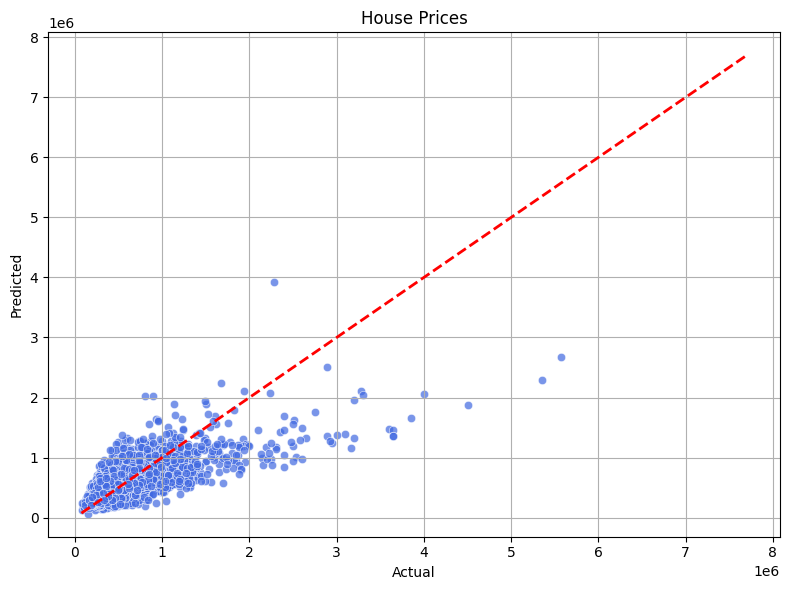

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = y_test, y = pred, alpha = 0.7, color = 'royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

The *scatter plot* visually compares the actual house prices (x-axis) to the predicted house prices (y-axis) produced by a regression model.

- Each blue dot represents a single house.
- The red dashed line represents the ideal case where predicted price equals actual price (
𝑦
=
𝑥
y=x).
- Points closer to the red line indicate more accurate predictions.
- The concentration of points in the lower-left area suggests most houses are in the lower price range.
- Points that deviate significantly from the line indicate prediction errors, with some high-priced houses being underestimated by the model.

In addition, this code produces a scatter plot to evaluate the performance of a regression model by comparing the actual target values *y_test* against the predicted values *pred*.

* Each point on the scatter plot represents an individual observation with its actual value on the x-axis and the predicted value on the y-axis.
* The red dashed line plotted from the minimum to the maximum value of the target variable represents the ideal case where the predicted values perfectly match the actual values.
* Points that lie exactly on this line indicate perfect predictions. The closer the points are to this line, the more accurate the model's predictions.
* The plot includes axis labels, a title, grid lines for enhanced readability, and uses transparency *alpha = 0.7* to better visualize overlapping points.
* The figure size is set to 8 by 6 inches, and *tight_layout* is applied to optimize spacing.

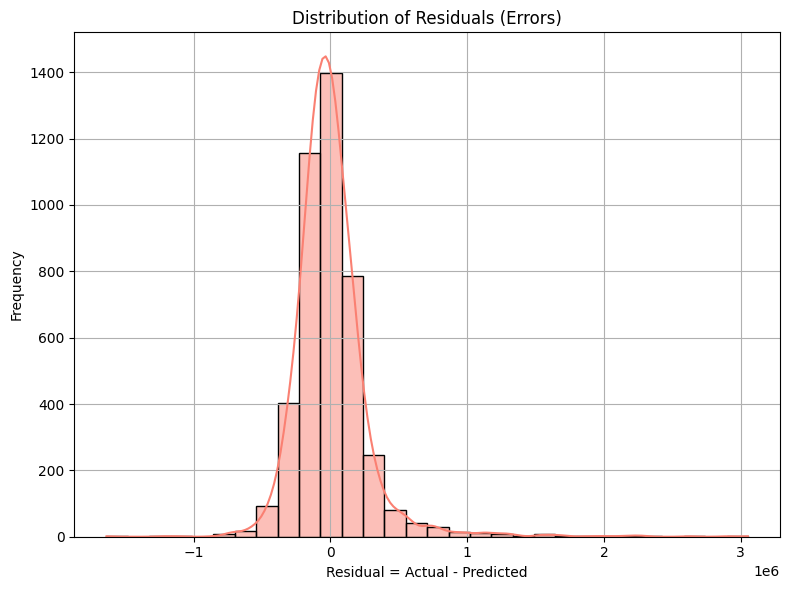

In [ ]:
residuals = y_test - pred

plt.figure(figsize = (8, 6))
sns.histplot(residuals, kde = True, bins = 30, color = 'salmon')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual = Actual - Predicted")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Initially, residuals are calculated as the difference between the actual target values and the predicted values.

*Formula:* $\text{residual} = y_{\text{actual}} - y_{\text{predicted}}$

* The histogram displays how these residuals are distributed across the dataset. It shows the frequency of residual values grouped into 30 bins.

* A kernel density estimate (KDE) curve is overlaid on the histogram to provide a smooth estimate of the residuals’ probability density function.

* Grid lines improve visual readability, and *tight_layout* ensures proper spacing around plot elements.

* The figure size is set to 8 by 6 inches, and the color of the histogram bars is set to ‘salmon’.

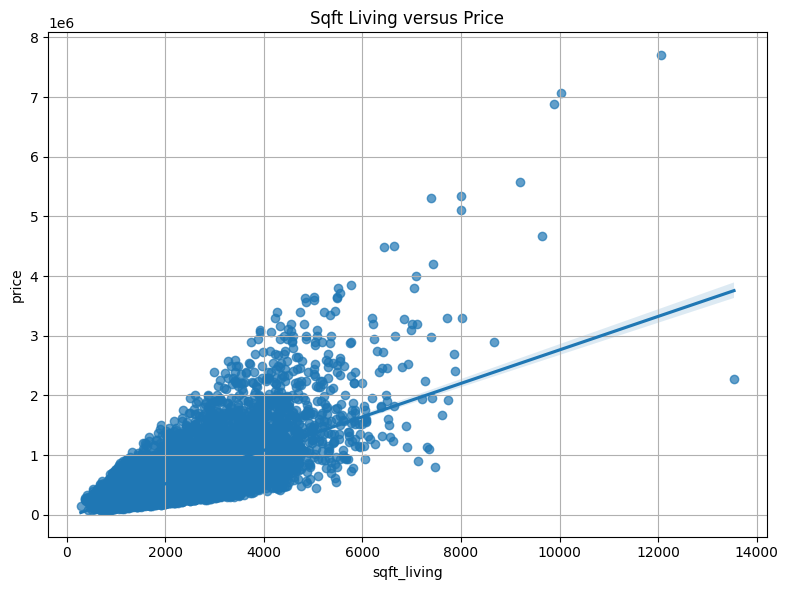

In [ ]:
plt.figure(figsize = (8, 6))
sns.regplot(x = 'sqft_living', y = 'price', data = data, scatter_kws = {'alpha': 0.7})
plt.title("Sqft Living versus Price")
plt.grid(True)
plt.tight_layout()
plt.show()

This code creates a scatter plot with a fitted regression line to explore the relationship between the living area size and house price in the dataset.

* Each point represents a house with its living area on the x-axis and its price on the y-axis.

* The *sns.regplot* function not only plots the individual data points but also fits and displays a linear regression line that best describes the trend between *sqft_living* and *price*.

* The parameter *scatter_kws={'alpha': 0.7}* makes the points slightly transparent, improving visualization especially when points overlap.

* The plot includes a descriptive title, grid lines for readability, and uses *tight_layout* to optimize spacing.

To be concluded that this visualization is useful to visually assess the strength and direction of the linear relationship between the size of the living area and the house price, providing intuition about how changes in square footage influence price.


In [ ]:
#FINALLY

***IN CONCLUSION, I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

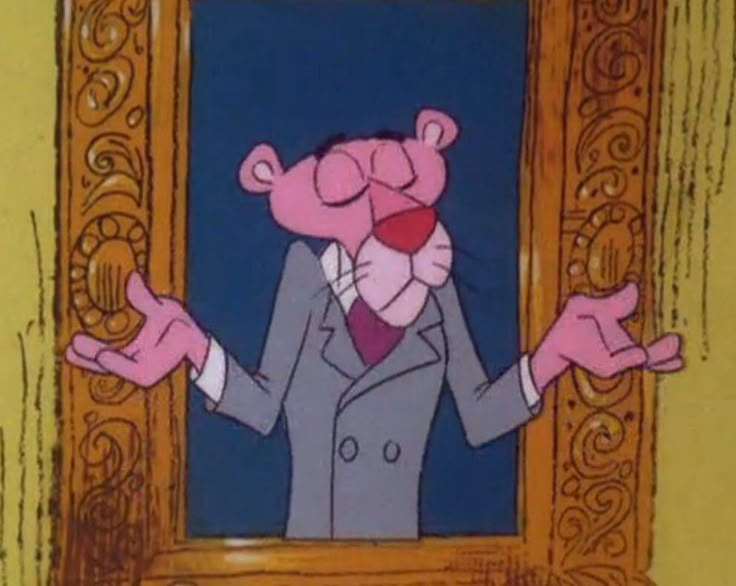